In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Clustering with k-means

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

We perform k-means clustering on the dataset with the following features:
- Education category
- Sex
- Race
- Marital
- Manner of death

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, SpectralClustering
from sklearn import decomposition

In [131]:
features = np.genfromtxt("features.csv")
selected = np.random.randint(features.shape[0],size=10000)
X = features[selected,:]
# If we want transform categorical features
# enc = OneHotEncoder()
# X = enc.fit_transform(X)
model = KMeans(n_clusters=3)
model.fit(X)
print("Cluster centers:")
for c in model.cluster_centers_:
    print(c)

Cluster centers:
[ 2.45119467  0.52509724  1.2652343   1.62474532  6.98407112]
[ 3.16034985  0.44606414  1.27453839  1.42274052  0.47473275]
[ 4.65159261  0.47267007  1.2143138   1.51160047  6.98938262]


When we try to interpret the centroid values of the clusters we can see that three clusters were extracted:
- People with high education category that died from Natural death
- People with average education category that died from Accident/Suicide
- People with average education category that died from Natural death

In general, clustering with more clusters does not give us interpretable results, and usually separates the data by the education category and different manners of death

## PCA for clustering visualization in 2D

To visualize the results of clustering in 2D we use Principle Component Analysis and take first two principal components

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [111]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

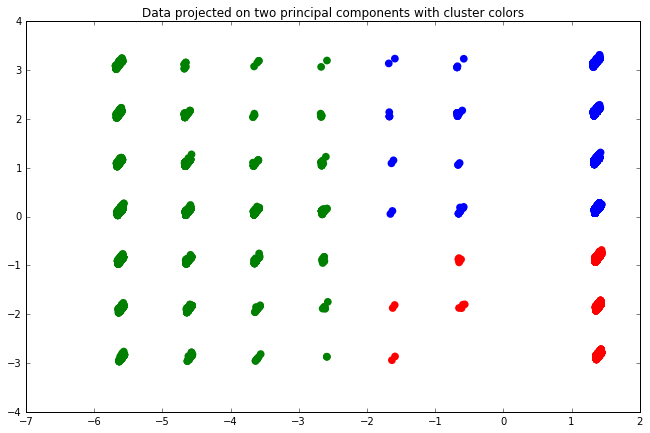

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

colors = np.choose(model.labels_, ["r","g", "b"])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, cmap=plt.cm.spectral, lw=0, s=60)
plt.title("Data projected on two principal components with cluster colors")

plt.show()

# Biclustering

http://scikit-learn.org/stable/modules/biclustering.html

We tried to apply biclustering  to find some patterns in the following dataset:
- Age Cateogry / Cause of death frequency table


In [21]:
normalized_age_cause = pd.read_csv("normalized_age_cause.csv")
age_cause = pd.read_csv("age_cause.csv")

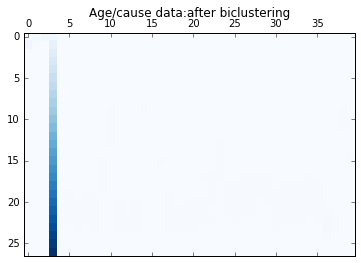

In [134]:
from sklearn.cluster.bicluster import SpectralBiclustering

model = SpectralBiclustering(n_clusters=3)
model.fit(normalized_age_cause)

row_indices = np.argsort(model.row_labels_)
fit_data = normalized_age_cause.iloc(row_indices)
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("Age/cause data:after biclustering")

plt.show()

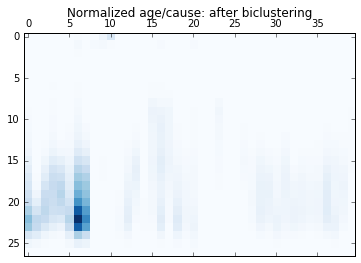

In [135]:
model = SpectralBiclustering(n_clusters=3)
model.fit(age_cause)

row_indices = np.argsort(model.row_labels_)
fit_data = age_cause.iloc(row_indices)
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("Normalized age/cause: after biclustering")

plt.show()